# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

# Load Data

In [2]:
train = pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
test = pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
sample_sub = pd.read_csv('sample_submission_M0L0uXE.csv')
sample_sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Drop Employee id column

In [5]:
train = train.drop('employee_id', axis=1)
test = test.drop('employee_id', axis=1)

# Getting Information about data

Shape of data

In [6]:
print('Train data contains', train.shape[0], 'rows and', train.shape[1], 'columns')
print('Train data contains', test.shape[0], 'rows and', test.shape[1], 'columns')

Train data contains 54808 rows and 13 columns
Train data contains 23490 rows and 12 columns


Data Description

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [9]:
train.describe(include='O').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


# Checking null values

In [6]:
(train.isnull().sum() / len(train)) * 100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [7]:
(test.isnull().sum() / len(train)) * 100

department              0.000000
region                  0.000000
education               1.886586
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    3.306087
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

# Filling null Values

In [8]:
def fill_na(frame):
    for i in frame.columns:
        if(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'int64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'O'):
            frame[i] = frame[i].fillna(frame[i].mode()[0])
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'float64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
fill_na(train)
fill_na(test)

# Check Outliers

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


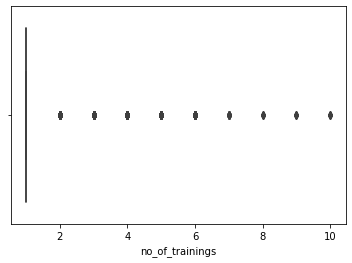

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


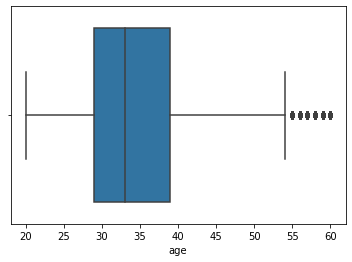

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


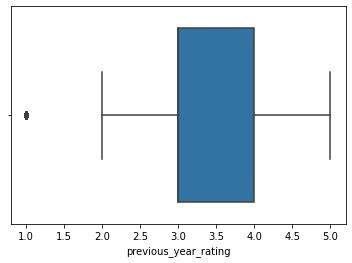

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


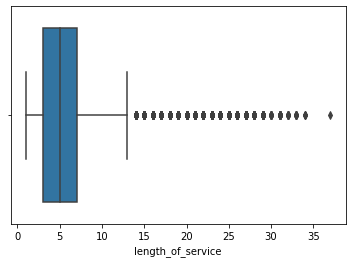

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


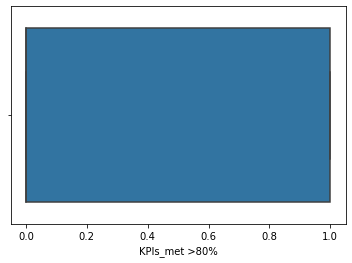

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


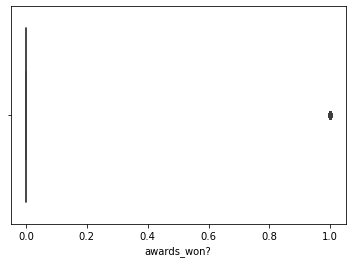

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


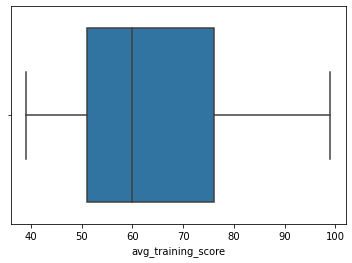

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


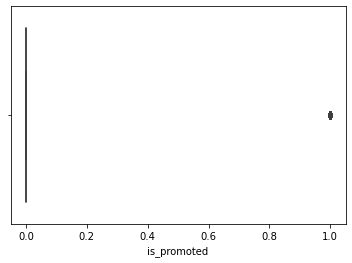

In [14]:
def detect_outliers(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(frame[i])
            plt.show()

        elif(frame[i].dtype == 'float64'):
            sns.boxplot(frame[i])
            plt.show()
            
detect_outliers(train)

# EDA

# Univariant Analysis

no_of_trainings


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


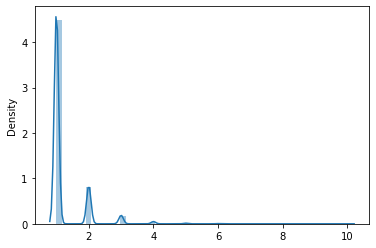

age


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


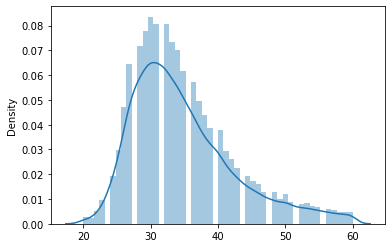

previous_year_rating


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


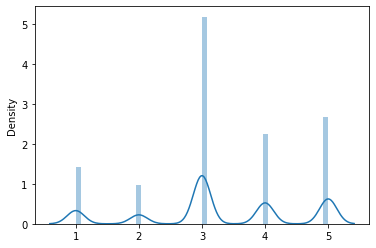

length_of_service


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


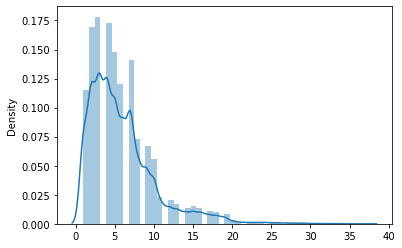

KPIs_met >80%


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


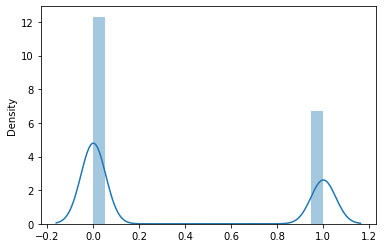

awards_won?


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


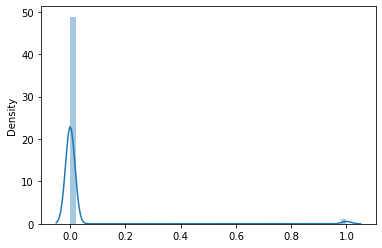

avg_training_score


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


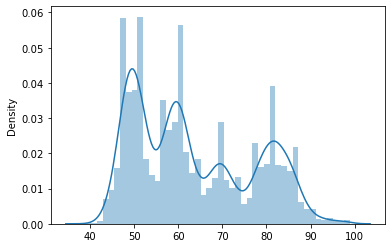

is_promoted


C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


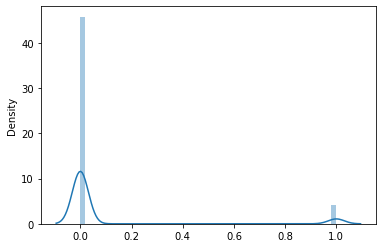

In [14]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            sns.distplot(x=frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            print(i)
            sns.distplot(x=frame[i])
            plt.show()
            
univariant(train)

# BiVariant Analysis

department VS department


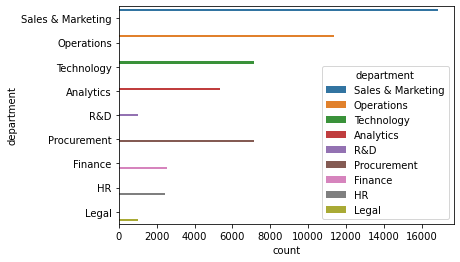

region VS department


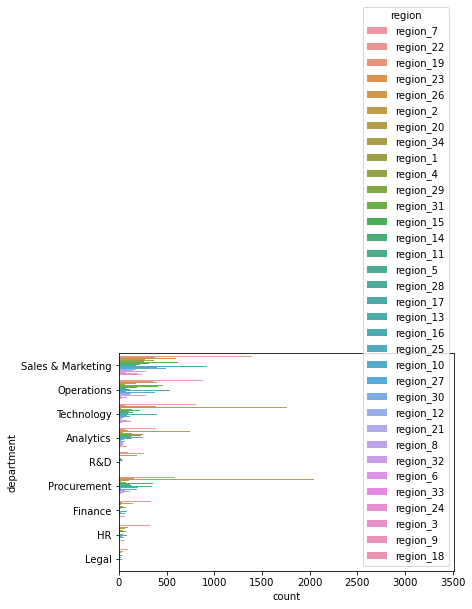

education VS department


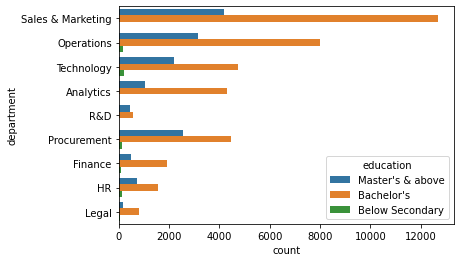

gender VS department


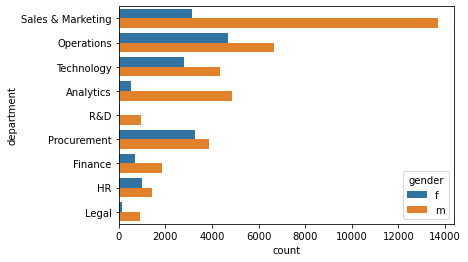

recruitment_channel VS department


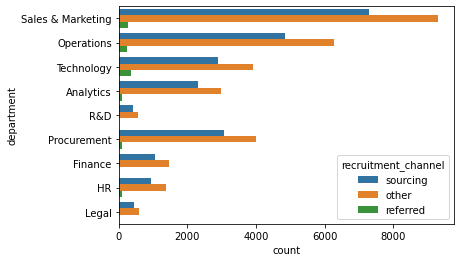

department VS region


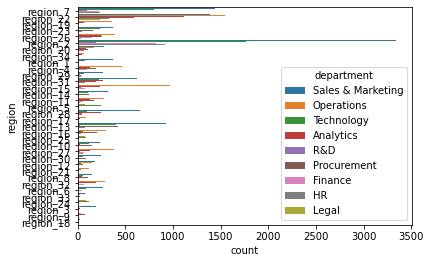

region VS region


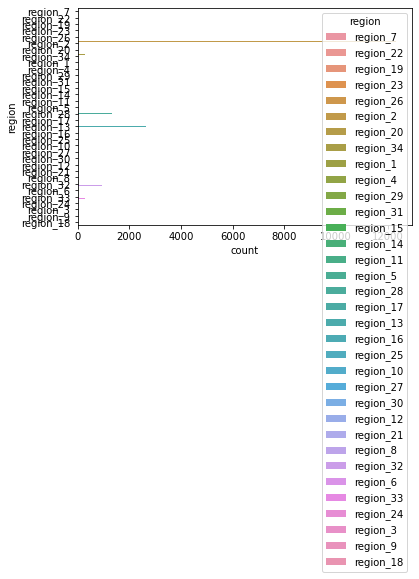

education VS region


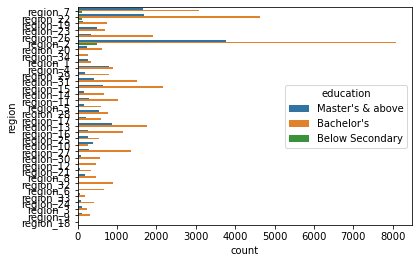

gender VS region


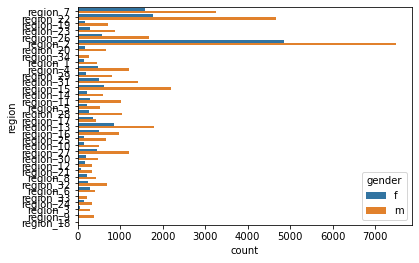

recruitment_channel VS region


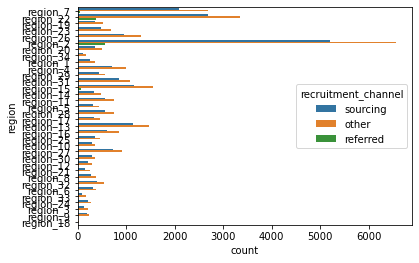

department VS education


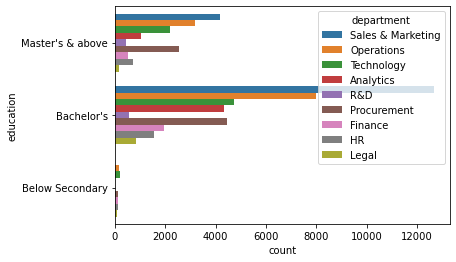

region VS education


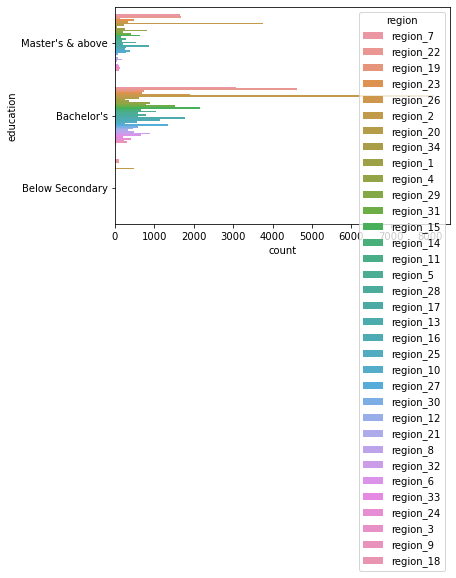

education VS education


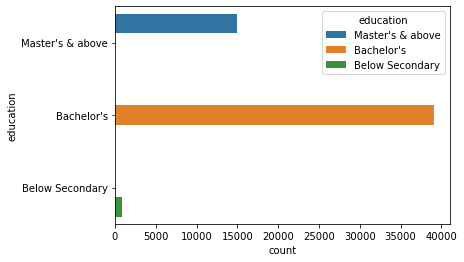

gender VS education


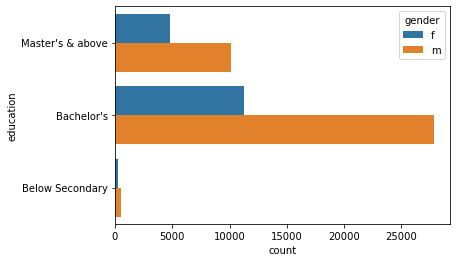

recruitment_channel VS education


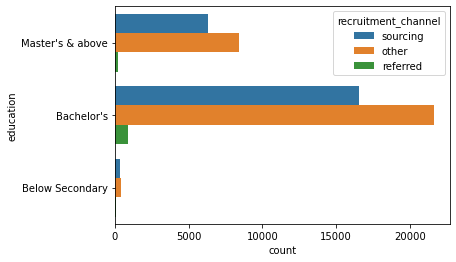

department VS gender


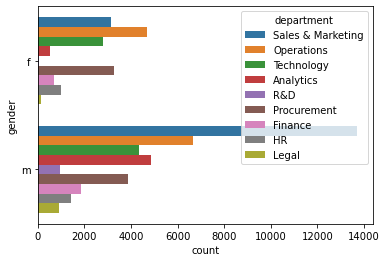

region VS gender


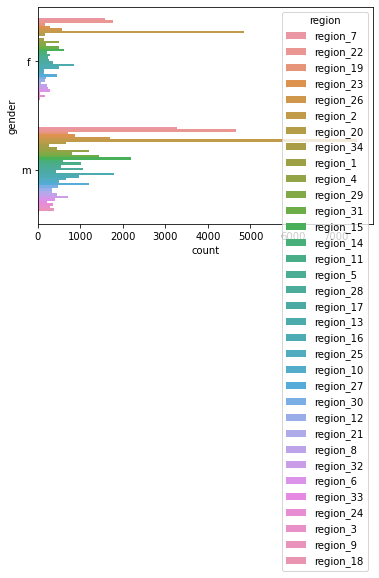

education VS gender


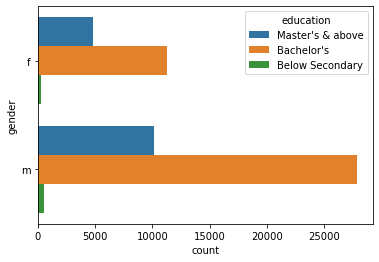

gender VS gender


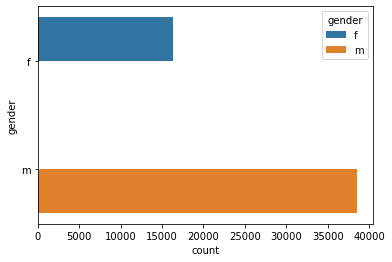

recruitment_channel VS gender


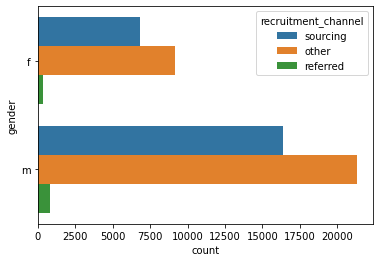

department VS recruitment_channel


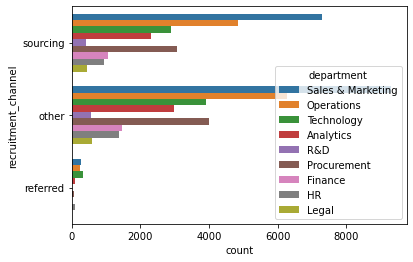

region VS recruitment_channel


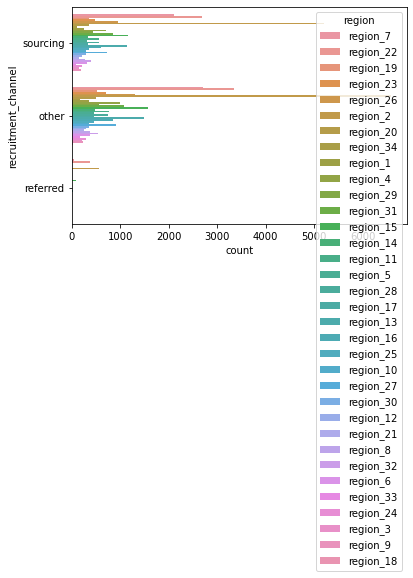

education VS recruitment_channel


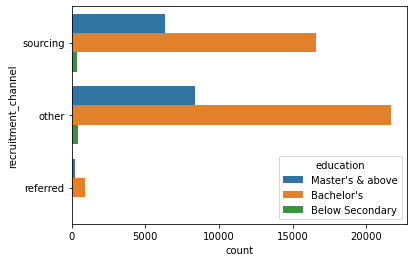

gender VS recruitment_channel


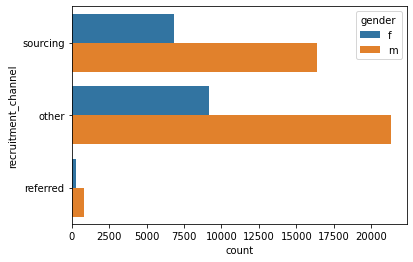

recruitment_channel VS recruitment_channel


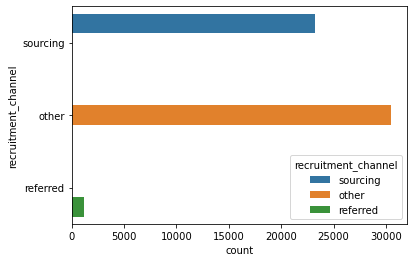

In [11]:
def bivariant(frame):
    for i in frame.columns:
        for j in frame.columns:
            if((frame[i].dtype == 'O') & (frame[j].dtype == 'O')):
                print(j, 'VS', i)
                sns.countplot(hue = frame[j], y= frame[i])
                plt.show()
            
bivariant(train)

# Chack the relationship with Target variable

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


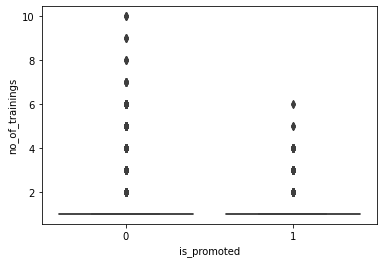

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


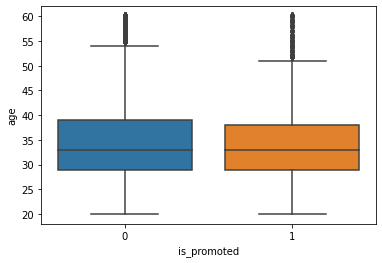

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


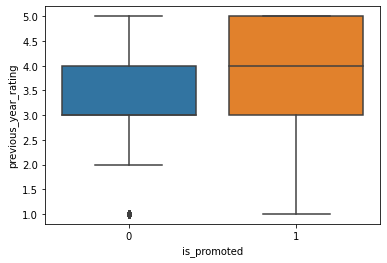

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


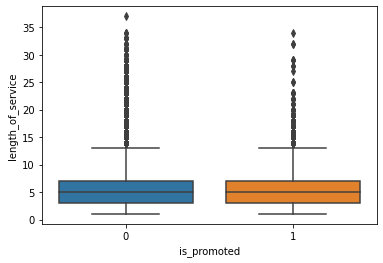

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


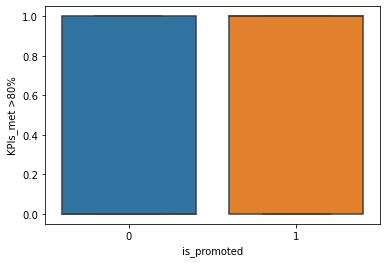

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


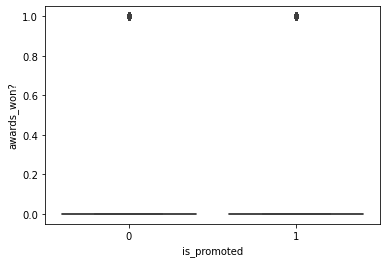

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


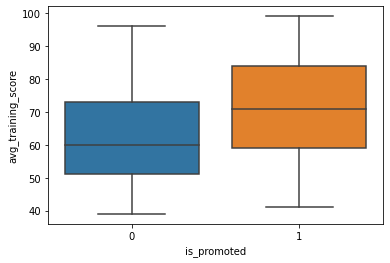

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


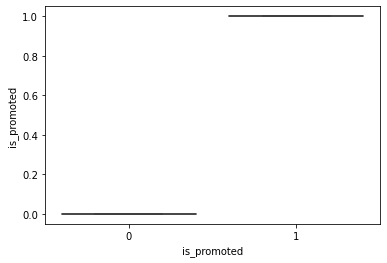

In [15]:
def target(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(train['is_promoted'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.boxplot(train['is_promoted'], frame[i])
            plt.show()
            
target(train)

# MultiVariant Analysis

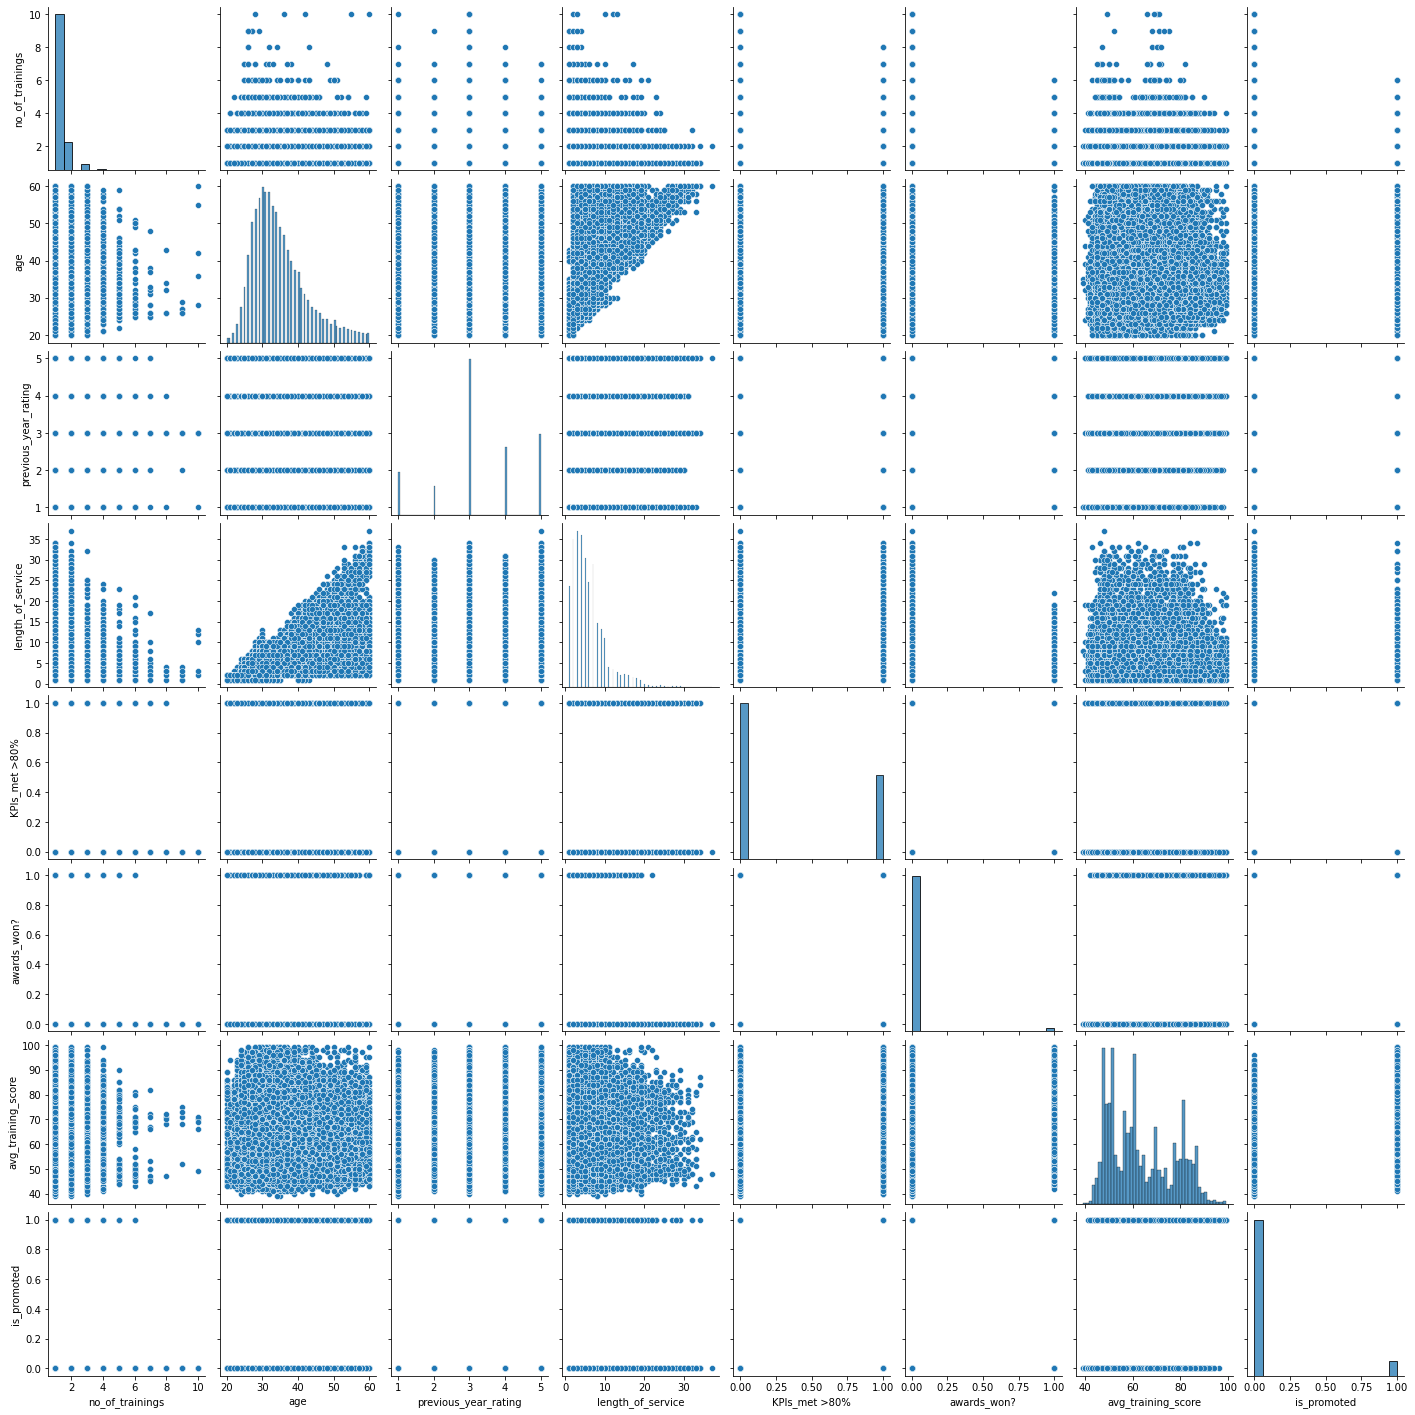

In [16]:
sns.pairplot(train)

# Encode Categorical Columns

In [10]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(train)
encode(test)

# Splitting Data into train and test

In [11]:
x = train.drop('is_promoted', axis=1)
y = train['is_promoted']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Create Models

# 1. Logistic Regression

In [12]:
logistic = LogisticRegression(max_iter=100000)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=100000)

In [13]:
logistic_pred = logistic.predict(X_test)
print(classification_report(Y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15058
           1       0.62      0.07      0.12      1385

    accuracy                           0.92     16443
   macro avg       0.77      0.53      0.54     16443
weighted avg       0.90      0.92      0.89     16443



# 2. XGBoost Classifier

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.90      0.37      0.52      1385

    accuracy                           0.94     16443
   macro avg       0.92      0.68      0.75     16443
weighted avg       0.94      0.94      0.93     16443



In [16]:
f1_score(Y_test, xgb_pred)

0.5227621483375959

# Hyper Parameter Tuning

In [17]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,4,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0,1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25, 0.5, 0.75, 1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

In [18]:
random_cv = RandomizedSearchCV(estimator = xgb,
                              param_distributions = hyperparameter_grid,
                              cv=5,
                              n_iter=50, 
                              scoring='accuracy',
                              n_jobs=4,
                              verbose=7,
                              return_train_score=True,
                              random_state=10)

random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 13.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 20.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 25.5min finished
C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           tree_method='exact',
                                           validate_parameters=1,
      

In [19]:
random_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
axgb = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
axgb.fit(X_train, Y_train)

[17:23:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
axgb_pred = axgb.predict(X_test)
print(classification_report(Y_test, axgb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.96      0.36      0.52      1385

    accuracy                           0.94     16443
   macro avg       0.95      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [22]:
f1_score(Y_test, axgb_pred)

0.5186743819042609

# Feature Selection

In [23]:
th = np.sort(xgb.feature_importances_)
l = []
for g in th:
    select = SelectFromModel(xgb, threshold = g, prefit = True)
    x_train = select.transform(X_train)
    model = XGBClassifier()
    model.fit(x_train, Y_train)
    x_test = select.transform(X_test)
    y_pred = model.predict(x_test)
    accuracy = f1_score(Y_test, y_pred)
    print('Threshold:', g, 'Model Score:', accuracy)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.016039489 Model Score: 0.5227621483375959


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.016772538 Model Score: 0.5168195718654435


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.017647957 Model Score: 0.514489069649212


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.01791308 Model Score: 0.5170831208567058


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.018692844 Model Score: 0.523517382413088


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.019723717 Model Score: 0.5211995863495347


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.020262081 Model Score: 0.5237851662404092


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.055724535 Model Score: 0.5248301097752223


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.078882016 Model Score: 0.5220588235294118
[17:25:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.13295776 Model Score: 0.05524861878453039
[17:25:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.16284212 Model Score: 0.10249671484888304


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.44254193 Model Score: 0.0


In [58]:
imp = pd.DataFrame(xgb.feature_importances_)
imp.index = X_train.columns
f_imp = imp[imp[0] < 0.055724535]
f_imp

,0
region,0.020262
education,0.018693
gender,0.019724
recruitment_channel,0.016773
no_of_trainings,0.016039
age,0.017648
length_of_service,0.017913


In [26]:
# creating new_df
new_df = train.copy()
new_test = test.copy()
new_df = new_df.drop(['region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'length_of_service'], axis=1)
new_test = new_test.drop(['region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'length_of_service'], axis=1)

In [27]:
new_x = new_df.drop('is_promoted', axis=1)
new_y = new_df['is_promoted']

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=1)

In [61]:
fxgb = XGBClassifier()
fxgb.fit(new_X_train, new_Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
fxgb_pred = fxgb.predict(new_X_test)
print(classification_report(new_Y_test, fxgb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.95      0.36      0.52      1385

    accuracy                           0.94     16443
   macro avg       0.95      0.68      0.75     16443
weighted avg       0.95      0.94      0.93     16443



In [63]:
f1_score(new_Y_test, fxgb_pred)

0.5248301097752223

# Hyper Parameter Tuning after feature selection 

In [152]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,4,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0,1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25, 0.5, 0.75, 1]

fhyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

In [153]:
frandom_cv = RandomizedSearchCV(estimator = xgb,
                              param_distributions = fhyperparameter_grid,
                              cv=5,
                              n_iter=50, 
                              scoring='accuracy',
                              n_jobs=4,
                              verbose=7,
                              return_train_score=True,
                              random_state=10)

frandom_cv.fit(new_X_train, new_Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 15.6min finished
C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:01:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           tree_method='exact',
                                           validate_parameters=1,
      

In [154]:
frandom_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
fhxgb = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
fhxgb.fit(new_X_train, new_Y_train)

[17:45:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
fhxgb_pred = fhxgb.predict(new_X_test)
print(classification_report(new_Y_test, fhxgb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.95      0.36      0.52      1385

    accuracy                           0.94     16443
   macro avg       0.95      0.68      0.75     16443
weighted avg       0.94      0.94      0.93     16443



In [66]:
f1_score(new_Y_test, fhxgb_pred)

0.5196437925615506

# Using Smote for Balancing the data

In [24]:
smote = SMOTETomek()

In [31]:
x_train, y_train = smote.fit_resample(X_train, Y_train)

sxgb = XGBClassifier()
sxgb.fit(x_train, y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
sxgb_pred = sxgb.predict(X_test)
print(classification_report(Y_test, sxgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15058
           1       0.42      0.49      0.45      1385

    accuracy                           0.90     16443
   macro avg       0.68      0.72      0.70     16443
weighted avg       0.91      0.90      0.90     16443



In [55]:
f1_score(new_Y_test, sxgb_pred)

0.5152877697841726

In [52]:
from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler(0.2)
x_train, y_train = ro.fit_resample(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [53]:
sxgb = XGBClassifier()
sxgb.fit(x_train, y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
sxgb_pred = sxgb.predict(X_test)
print(classification_report(Y_test, sxgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15058
           1       0.68      0.41      0.52      1385

    accuracy                           0.93     16443
   macro avg       0.82      0.70      0.74     16443
weighted avg       0.93      0.93      0.93     16443



# 3. Random Forest Classifier

In [106]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [107]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15058
           1       0.84      0.29      0.43      1385

    accuracy                           0.94     16443
   macro avg       0.89      0.64      0.70     16443
weighted avg       0.93      0.94      0.92     16443



In [108]:
f1_score(Y_test, rf_pred)

0.4254173397953689

# 4. Ada Boost Classifier

In [43]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [44]:
ada_pred = ada.predict(X_test)
print(classification_report(Y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15058
           1       0.73      0.17      0.27      1385

    accuracy                           0.92     16443
   macro avg       0.83      0.58      0.62     16443
weighted avg       0.91      0.92      0.90     16443



# 5. SVC

In [178]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [179]:
svc_pred = svc.predict(X_test)
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15058
           1       0.00      0.00      0.00      1385

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443



C:\Users\sahil mathur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. KNN

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [52]:
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15058
           1       0.70      0.17      0.27      1385

    accuracy                           0.92     16443
   macro avg       0.81      0.58      0.62     16443
weighted avg       0.91      0.92      0.90     16443



# 7. Naive Byes

In [53]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [54]:
nb_pred = nb.predict(X_test)
print(classification_report(Y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95     15058
           1       0.47      0.13      0.21      1385

    accuracy                           0.91     16443
   macro avg       0.70      0.56      0.58     16443
weighted avg       0.89      0.91      0.89     16443



# 8. Stacking Classifier

In [119]:
estimators = [
    ('xgb' , XGBClassifier()),
    ('rf' , RandomForestClassifier()),
    ('ada' , AdaBoostClassifier()),
    ('knn', KNeighborsClassifier())
]

stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100,

In [120]:
stack_pred = stack.predict(X_test)
print(classification_report(Y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15058
           1       0.84      0.38      0.52      1385

    accuracy                           0.94     16443
   macro avg       0.89      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



In [121]:
f1_score(Y_test, stack_pred)

0.523168908819133

# Creating Submission File

In [96]:
new_test['is_promoted'] = fcat.predict(new_test)

In [97]:
submit = pd.DataFrame({
    'employee_id' : sample_sub['employee_id'],
    'is_promoted' : new_test['is_promoted']
})
submit.to_csv('Submition.csv', index=False)

# Best Model

My best model is XGBoost Regressor after feature selection